## 케라스 모델을 만드는 방법

In [1]:
# Sequential 클래스
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [2]:
# 점진적으로 Sequenential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# 가중치를 만들기위해 모델을 호출

In [3]:
import numpy as np
model.build(input_shape=(None,3))

In [4]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.12489599, -0.5033334 ,  0.6563575 , -0.5871707 ,  0.06539696,
          0.20056713,  0.6515031 , -0.2207832 , -0.00230378,  0.08511448],
        [ 0.35768354,  0.23605603, -0.4431311 ,  0.00251448,  0.40753496,
          0.12637109,  0.38636887,  0.5721401 ,  0.5108067 , -0.5329608 ],
        [ 0.4147991 , -0.03072786,  0.60190105, -0.2523677 , -0.18923417,
         -0.2748652 , -0.5180805 , -0.01303905,  0.23454839,  0.17988002]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 2.40946651e-01, -3.43191087e-01, -2.09794283e-01,
          2.86979973e-01, -1.75809860e-02,  4.04612303e-01,
         -8.40447843e-02, -3.11802626e-01, -8.73837471e-02,
         -6.06323183e-02],
        [ 3.03714454e-01, -1.07917190e-02, -4.4646641

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = keras.Sequential(name='myModel')
model.add(layers.Dense(64,activation='relu', name='first_layer'))
model.add(layers.Dense(10,activation='relu', name='last_layer'))
model.build((None,3))
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                256       
                                                                 
 last_layer (Dense)          (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델의 입력 크기를 미리 지정
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API
# 두개의 Dense층을 가지는 간단한 함수형 모델

In [9]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64,activation='relu')(inputs)
outputs = layers.Dense(10,activation='softmax')(features)

In [10]:
model = keras.Model(inputs=inputs, outputs=features)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 다중입력, 다중 출력 함수형 모델

In [12]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [13]:
title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

In [14]:
features =  layers.Concatenate()([title,text_body,tags])
features =  layers.Dense(64,activation='relu')(features)
priority = layers.Dense(1,activation='sigmoid',name='priority')(features)
department =  layers.Dense(num_departments,activation='softmax',name='department')(features)
model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department])

In [15]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

# 입력과 타깃 배열 리스트를 전달해서 모델 훈련

In [16]:
import numpy as np
num_samples = 1280
title_data = np.random.randint(0,2, size=(num_samples, vocabulary_size))
text_body = np.random.randint(0,2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples,num_tags))

In [17]:
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples, num_departments))

In [18]:
model.compile(optimizer='adam',loss = ['mse','categorical_crossentropy'],metrics=['mae','acc'])

In [19]:
history = model.fit([title_data,text_body, tags_data],[priority_data,department_data],epochs=1)

40/40 [==============================] - 1s 9ms/step - loss: 6.2220 - priority_loss: 0.3334 - department_loss: 5.8886 - priority_mae: 0.4989 - priority_acc: 0.0000e+00 - department_mae: 0.5003 - department_acc: 0.2586


In [20]:
model.evaluate([title_data,text_body, tags_data],[priority_data,department_data])

40/40 [==============================] - 0s 4ms/step - loss: 3.2782 - priority_loss: 0.3480 - department_loss: 2.9301 - priority_mae: 0.5147 - priority_acc: 0.0000e+00 - department_mae: 0.4507 - department_acc: 0.2531


[3.278179883956909,
 0.3480483889579773,
 2.930131196975708,
 0.5146908760070801,
 0.0,
 0.4507027566432953,
 0.25312501192092896]

In [21]:
priority_preds, department_preds = model.predict([title_data, text_body, tags_data])

In [22]:
priority_preds, department_preds

(array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[0.31838727, 0.02100825, 0.44317153, 0.21743289],
        [0.1062587 , 0.15713605, 0.19055142, 0.54605377],
        [0.37391877, 0.02187188, 0.36028618, 0.24392322],
        ...,
        [0.34560615, 0.0314583 , 0.40672678, 0.21620883],
        [0.23823936, 0.09042546, 0.35157958, 0.31975558],
        [0.1680734 , 0.0305767 , 0.37533036, 0.42601946]], dtype=float32))

# 입력 타깃과 배열을 딕셔너리로 전달해서 모델을 훈련

In [23]:
model.compile(optimizer='adam',
              loss = {"priority" : 'mse', "department":'categorical_crossentropy'},
              metrics={"priority":['mae'],"department":['acc']}
             )

history = model.fit(
    {"title":title_data,
     "text_body":text_body, 
     "tags":tags_data},
    {
        "priority":priority_data,
        "department":department_data}
    ,epochs=1)

model.evaluate(
    {"title":title_data,
     "text_body":text_body, 
     "tags":tags_data},
    {
        "priority":priority_data,
        "department":department_data}
)
priority_preds, department_preds = model.predict(
    {
        "title":title_data, 
        "text_body":text_body, 
        "tags":tags_data
    }
)

40/40 [==============================] - 0s 4ms/step - loss: 4.6637 - priority_loss: 0.3480 - department_loss: 4.3157 - priority_mae: 0.5147 - department_acc: 0.3195


# 함수형 API의 장점 : 층 연결구조 활용

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

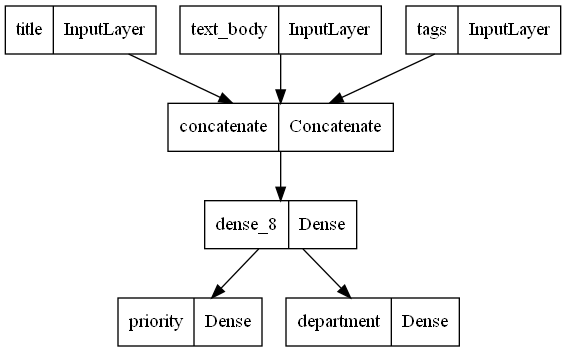

In [25]:
keras.utils.plot_model(model,'tiket_classifier.png')

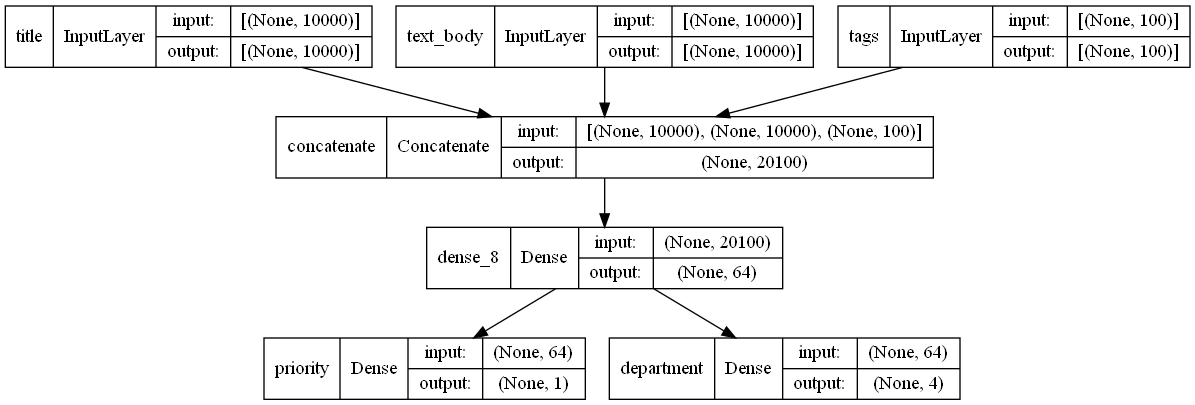

In [26]:
keras.utils.plot_model(model,'tiket_classifier_with_shape_info.png',show_shapes=True)

# 함수형 모델에 있는 층의 입력과 출력을 출력

In [27]:
model.layers

In [28]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [29]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

# 중간층의 출력을 재사용해서 새로운 모델 

In [30]:
# feature = model.layers[4].output
# difficulty =  layers.Dense(3,activation='softmax',name='difficulty')(feature)
# new_model = keras.Model(inputs =[title,text_body,tags] ,  outputs = [priority,department])
# model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department,difficulty])

# Model 서브 클래싱

In [31]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs=outputs)
class MyModel(keras.Model):
    def __init__(self,num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64,activation='relu')
        self.classifier = binary_classifier
        print("__init__")
    def call(self, inputs):
        features = self.dense(inputs)
        print("call")
        return self.classifier(features)

In [33]:
# 표준 플로우 워크 : compile(), fit(), evaluate(), predict()

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512,activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [36]:
(images,labes),(test_images, test_labels) = mnist.load_data()

In [37]:
images.shape

(60000, 28, 28)

In [38]:
# 전처리  28*28 - > 28 x 28
# 데이터 표준화
split = 10000
images = images.reshape(-1,28*28).astype('float32') / 255
test_images = test_images.reshape(-1,28*28).astype('float32') / 255
# 데이터를 분할 : 테스트 데이터 10000
train_images,val_images = images[:-split],images[-split:]
train_labels,val_labels = labes[:-split],labes[-split:]

In [39]:
train_images.shape, val_images.shape, train_labels.shape, val_labels.shape

((50000, 784), (10000, 784), (50000,), (10000,))

In [40]:
model = get_mnist_model()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(train_images,train_labels,epochs=3,validation_data=(val_images,val_labels))

Epoch 1/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2933 - acc: 0.9136 - val_loss: 0.1317 - val_acc: 0.9595
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1491 - acc: 0.9551 - val_loss: 0.0947 - val_acc: 0.9719
Epoch 3/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1155 - acc: 0.9641 - val_loss: 0.0909 - val_acc: 0.9720


In [41]:
test_metrics =  model.evaluate(test_images,test_labels)
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - acc: 0.9736


### 사용자 정의 지표 구현

In [42]:
import tensorflow as tf
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name,**kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(
            name='total_samples', initializer='zeros', dtype='int32')
    def update_state(self, y_true, y_pred, sample_weight = None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true-y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    def reset_state(self):
        self.mse_sum.assign(0)
        self.total_samples.assign(0)

In [43]:
model = get_mnist_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',RootMeanSquaredError()])
model.fit(train_images,train_labels,epochs=3,validation_data=(val_images,val_labels))
test_metrics = model.evaluate(test_images,test_labels)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.9107 - rmse: 7.1280 - val_loss: 0.1259 - val_accuracy: 0.9645 - val_rmse: 7.3367
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1484 - accuracy: 0.9553 - rmse: 7.3062 - val_loss: 0.0916 - val_accuracy: 0.9729 - val_rmse: 7.3711
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9745 - rmse: 7.4098


In [44]:
# callback method
callback_list = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2),
    keras.callbacks.ModelCheckpoint(filepath='checkpoint_path.keras',
                                   monitor="val_loss",
                                   save_best_only=True)]
model = get_mnist_model()
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=100,callbacks=callback_list,validation_data=(val_images,val_labels))

Epoch 1/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2902 - accuracy: 0.9130 - val_loss: 0.1283 - val_accuracy: 0.9628
Epoch 2/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1507 - accuracy: 0.9549 - val_loss: 0.1031 - val_accuracy: 0.9693
Epoch 3/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1173 - accuracy: 0.9641 - val_loss: 0.0792 - val_accuracy: 0.9767
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0961 - accuracy: 0.9700 - val_loss: 0.0784 - val_accuracy: 0.9778
Epoch 5/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0870 - accuracy: 0.9721 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 6/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0773 - accuracy: 0.9759 - val_loss: 0.0737 - val_accuracy: 0.9801
Epoch 7/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0704 - accuracy: 0.9776 - val_loss: 0.0758 - val_ac

In [45]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9776


[0.07659559696912766, 0.9775999784469604]

In [46]:
restore_model = tf.keras.models.load_model('checkpoint_path.keras')

In [47]:
restore_model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9806


[0.06968656927347183, 0.9805999994277954]

### 사용자 정의 콜백

In [48]:
import matplotlib.pyplot as plt
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs):
        self.per_batch_losses = []
    def on_batch_end(self,batch,logs):        
        self.per_batch_losses.append(logs.get("loss"))
    def on_epoch_end(self,epoch,logs):        
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label='Training loss for each batch')
        plt.xlabel(f"Batch (epoch{epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [49]:
callback_list+[LossHistory()]

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.9128 - val_loss: 0.1273 - val_accuracy: 0.9642
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1476 - accuracy: 0.9551 - val_loss: 0.0997 - val_accuracy: 0.9687
Epoch 3/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9632 - val_loss: 0.0894 - val_accuracy: 0.9737
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1009 - accuracy: 0.9688 - val_loss: 0.0794 - val_accuracy: 0.9751
Epoch 5/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0829 - accuracy: 0.9737 - val_loss: 0.0748 - val_accuracy: 0.9783
Epoch 6/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0742 - accuracy: 0.9764 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9786 - val_loss: 0.0700 - val_ac

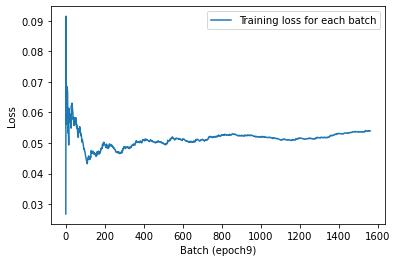

In [50]:
model = get_mnist_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=100,validation_data=(val_images,val_labels),
#           callbacks=[LossHistory()]
          callbacks=callback_list+[LossHistory()])

### 텐서보드를 이용한 모니터링과 시각화

In [51]:
model = get_mnist_model()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(log_dir='./tb_logs')
model.fit(train_images,train_labels,epochs=10,validation_data=(val_images,val_labels),
         callbacks=tensorboard)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.9108 - val_loss: 0.1237 - val_accuracy: 0.9653
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1492 - accuracy: 0.9556 - val_loss: 0.0948 - val_accuracy: 0.9720
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1164 - accuracy: 0.9632 - val_loss: 0.0823 - val_accuracy: 0.9771
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0976 - accuracy: 0.9693 - val_loss: 0.0740 - val_accuracy: 0.9782
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0861 - accuracy: 0.9727 - val_loss: 0.0731 - val_accuracy: 0.9797
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0763 - accuracy: 0.9763 - val_loss: 0.0796 - val_accuracy: 0.9785
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 0.0737 - val_accuracy:

In [52]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9814


[0.06958431750535965, 0.9814000129699707]

In [53]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

Reusing TensorBoard on port 6006 (pid 9344), started 0:08:36 ago. (Use '!kill 9344' to kill it.)

### 사용자 정의훈련, 평가 루프

In [54]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0,1,2]
predictions = [[1,0,0],[0,1,0],[0,0,1]]
metric.update_state(targets,predictions)
current_result = metric.result()
current_result

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [55]:
values = [0,1,2,3,4]
mean_tracker = keras.metrics.Mean()
mean_tracker.update_state(values)
mean_tracker.result()

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

### 훈련평가

In [56]:
model = get_mnist_model()                                # 모델 생성
loss_fn = keras.losses.SparseCategoricalCrossentropy()   # 손실 함수
optimizer = keras.optimizers.Adam()                      # 최적화 알고리즘
metrics = [keras.metrics.SparseCategoricalAccuracy()]    # 평가지표
loss_tracking_metric = keras.metrics.Mean()              # 손실 추적 함수

In [57]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs,training=True)
        loss = loss_fn(targets,predictions)
    gradients = tape.gradient(loss,model.trainable_weights)
    optimizer.apply_gradients(zip(gradients,model.trainable_weights))    
    logs = {}
    for metric in metrics:
        metric.update_state(targets,predictions)
        logs[metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    return logs

#### 단계별 훈련, 지표 재  설정

In [58]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()      

#### 단계별 훈련 루프 작성하기:훈련 루프 자체

In [59]:
import tensorflow as tf
training_dataset =  tf.data.Dataset.from_tensor_slices((train_images,train_labels ))
training_dataset = training_dataset.batch(32)
epochs=3
for epoch in range(epochs):
    for inputs_batch, targets_batch in training_dataset:
        logs=train_step(inputs_batch,targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9104
...loss: 0.2974
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9320
...loss: 0.2243
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9426
...loss: 0.1896
